# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit="&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" +weather_api_key + unit + "&q=" +city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...({e})")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | anar darah
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | christchurch
Processing Record 5 of Set 1 | paita
Processing Record 6 of Set 1 | prince rupert
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | antsiranana
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...({e})
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | slave lake
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,1.94,91,81,1.67,GL,1717963486
1,anar darah,32.7587,61.6540,29.67,15,0,7.36,AF,1717963486
2,hawaiian paradise park,19.5933,-154.9731,27.24,62,100,3.09,US,1717963487
3,christchurch,-43.5333,172.6333,12.49,83,45,1.54,NZ,1717963202
4,paita,-5.0892,-81.1144,21.60,70,19,6.81,PE,1717963487


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,1.94,91,81,1.67,GL,1717963486
1,anar darah,32.7587,61.6540,29.67,15,0,7.36,AF,1717963486
2,hawaiian paradise park,19.5933,-154.9731,27.24,62,100,3.09,US,1717963487
3,christchurch,-43.5333,172.6333,12.49,83,45,1.54,NZ,1717963202
4,paita,-5.0892,-81.1144,21.60,70,19,6.81,PE,1717963487


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

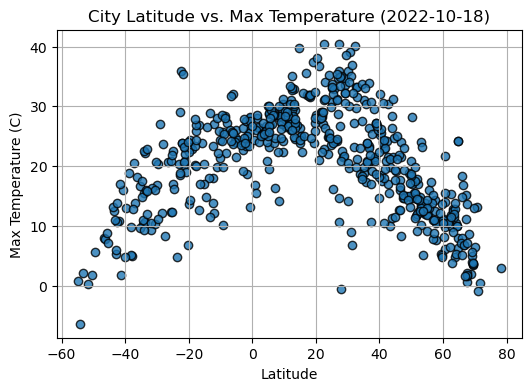

In [8]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df['Lat']
max_temperatures = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.figure(figsize=(6,4))
plt.scatter(latitudes,max_temperatures, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

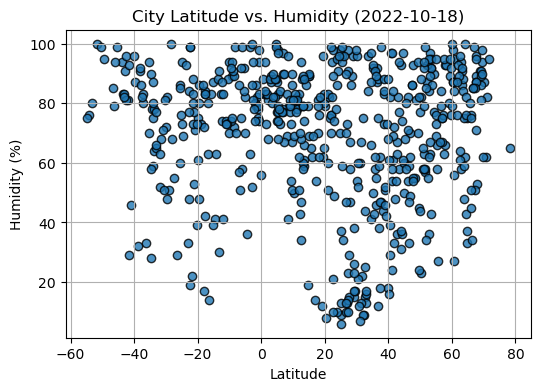

In [9]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.figure(figsize=(6,4))
plt.scatter(latitudes,humidity, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")
 
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

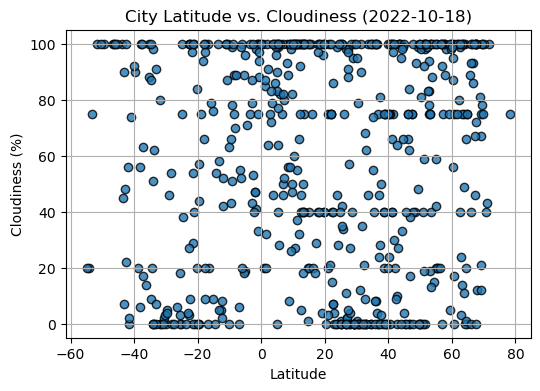

In [10]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.figure(figsize=(6,4))
plt.scatter(latitudes,cloudiness, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")
 
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

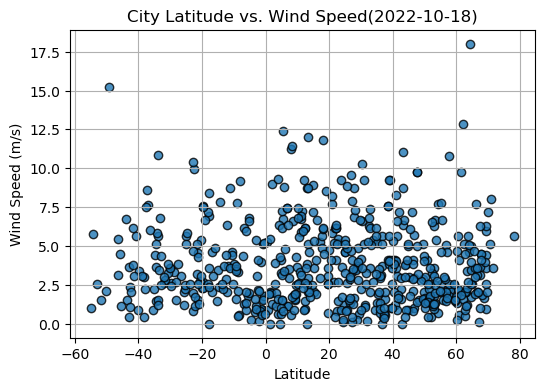

In [11]:
latitudes = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.figure(figsize=(6,4))
plt.scatter(latitudes,wind_speed, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Wind Speed(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")
 
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label):
    slope, intercept, r_value, p_value, std_error = linregress(x_axis, y_axis)

    regression_line = slope * x_axis + intercept

    line_eq = "y=" + str(round(slope,2)) + "x+" + str (round(intercept,2))

    # Plot scatter plot
    plt.figure(figsize=(6,4))
    plt.scatter(x_axis,y_axis, color='blue', alpha=0.65)
    
    # Plot regression line 
   
    plt.plot(x_axis, regression_line,"r-")
    plt.annotate(line_eq, (x_axis.min(), y_axis.min()), fontsize = 11, color = "red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(f"The r-value is:{r_value}")

    plt.show()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,1.94,91,81,1.67,GL,1717963486
1,anar darah,32.7587,61.6540,29.67,15,0,7.36,AF,1717963486
2,hawaiian paradise park,19.5933,-154.9731,27.24,62,100,3.09,US,1717963487
5,prince rupert,54.3161,-130.3201,12.05,77,100,7.72,CA,1717963290
6,pacific grove,36.6177,-121.9166,23.34,75,0,5.66,US,1717963488


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,christchurch,-43.5333,172.6333,12.49,83,45,1.54,NZ,1717963202
4,paita,-5.0892,-81.1144,21.60,70,19,6.81,PE,1717963487
9,grytviken,-54.2811,-36.5092,-6.35,76,20,5.79,GS,1717963489
10,antsiranana,-12.2787,49.2917,23.30,74,8,6.34,MG,1717963489
17,waitangi,-43.9535,-176.5597,13.23,94,100,6.71,NZ,1717963492


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.7351402655455549


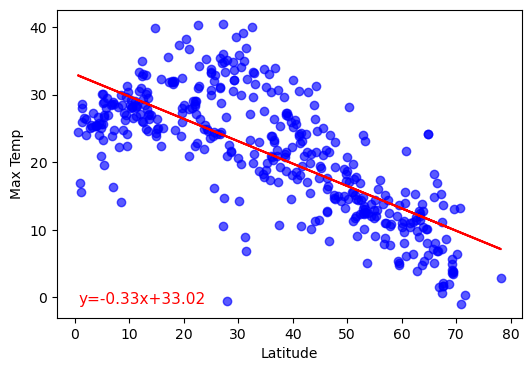

In [15]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp')
 

The r-value is:0.7338812779022511


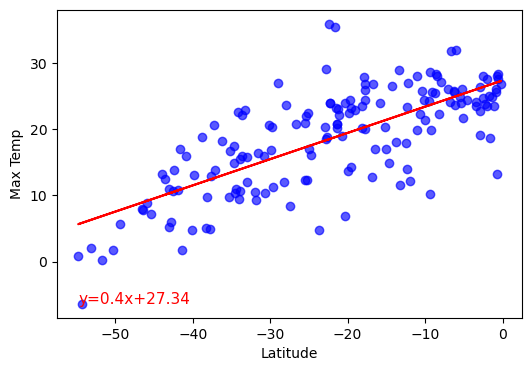

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** 
The Northern Hemisphere has a strong negative correlation whereby the Southern Hemisphere has a strong positive correlation (-0.74 and 0.73 respectively). This means that in the Northern Hemisphere, the temperatures tend to decrease as we move from equator to the North Pole increase in Latitude). In the Southern Hemisphere, it shows a positive correlation to show the temperature increases as we move from South Pole towards the equator (increase in Latitude).

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.027977258091699073


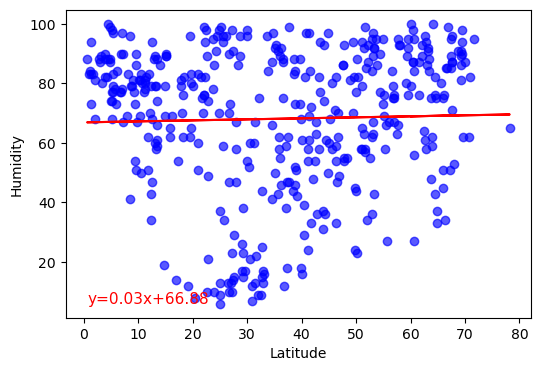

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity')

The r-value is:-0.016476407998078584


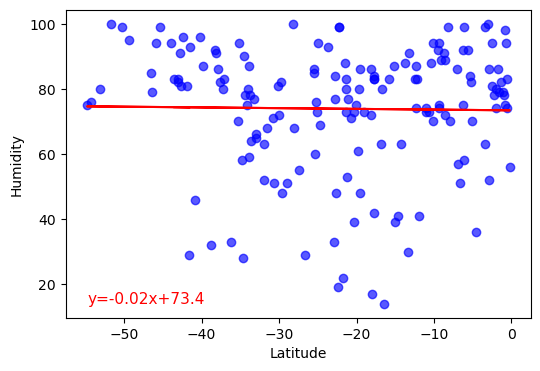

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** 
The Northern Hemisphere and Southern Hemispheres have really weak correlation between latitude and humidity (0.028 and -0.016 respectively). This suggests that latitude has little or to no influence on humidity levels and this part of linear regression calculation doesn't consider other factors such as temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.002869455387636346


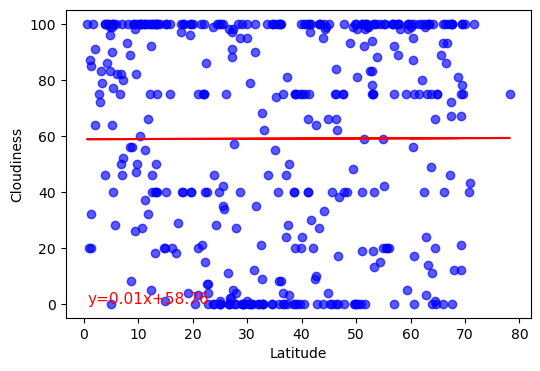

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness')

The r-value is:0.11878361720752509


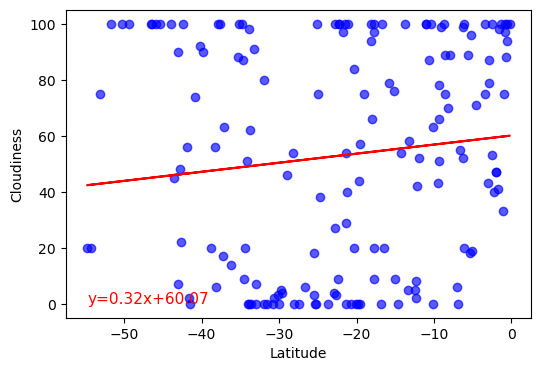

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** 
The Northern Hemisphere has an extremely weak positive correlation between latitude and cloudiness whereby the Southern Hemisphere also indicates a weak positive relationship, though slightly stronger than Northern Hemisphere (0.029 and 0.12 respectively). This suggests that latitude has little or to no influence on cloudiness and it's clearly insufficient to be the only factor to determine the cloudiness of an area.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.09113854781960967


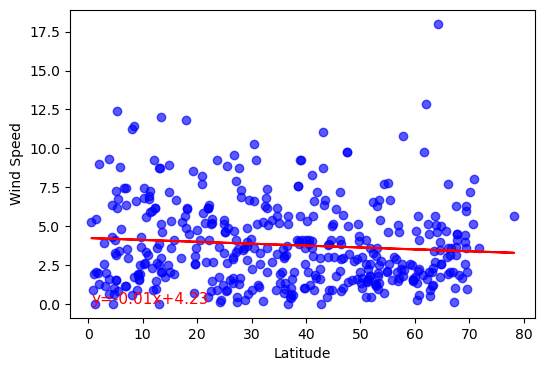

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed')

The r-value is:-0.133710063158559


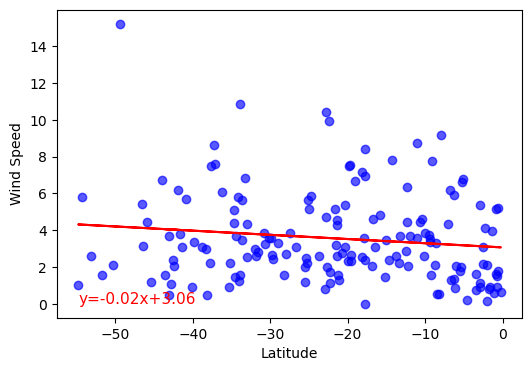

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** 
The Northern Hemisphere and Southern Hemispheres have really  weak negative correlation between latitude and wind speed(-0.091 and -0.13 respectively). This suggests that latitude alone is not a reliable predictor of wind speed. 